<a href="https://colab.research.google.com/github/alfazick/AppliedLLMCourse/blob/main/Module2Fine_tuning_ideas_Gradient_Descent_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# so we are moving to the topic of fine tuning
# the abstract idea is kind of on surface
# why not to take any open source model and adapt it to our own specific dataset
# it should work better right ?

In [53]:
# two ideas conflicting ideas
# 1) fine-tuning allows to show the model and concentrate on your task
# (kind of achieving transfer learning)
# 2) well your model already knows a lot of staff
# and when you are about to mess with it's weights
# are you sure you are not going to destroy something along the way ?

# a couple of aprroaches and challenges
# depending on what you may choose you can
# really destroy what you are trying to accomplish




In [54]:
# Approach # 1 Full Fine-Tuning
# like most simplest, if the model is small enough
# or like really base and was not instruct tuned before
# Problem # Computationally Expensive and as we said before
# when you mess up the weights it's called "catastrophic forgetting"

# so here to address that issue you may try regularization techniques
# where beside fine-tunning the model , you are providing
# original model weights, basically saying
# hey when you will update your weight don't update too far from the original


In [55]:

# Approach #2 Layer-wise Fine-Tunning
# well let's start with fine-tuning head and then gradually unfreeze earlier
# layers, alas we are back to square one
# the whole point of the model it weghts already optimized
# like beatuful compression and you are going to destroy it


In [56]:
# Approach #3 Parameter-Effecient Fine-Tunning(PEFT)
# ok so idea kind of, ok let's not touch original weghts
# but what we will do we are going to add extra paramters
# and only train them :)) haha brilliant right
# turns out works really well
# so here we should see LoRA(Low-Rank Adaptation)



In [57]:
# P.S some people think this idea makes PEFT effective
# "Lottery Tickets Theory"
# Models already knows everything, funny idea
# "The Lottery Ticket Hypothesis: Finding Sparse, Trainable Neural Networks" (2018)
# https://arxiv.org/abs/1803.03635

In [58]:

# Basic training loop Key ideas: recap DeepLearning Pytorch
# Brillian explanation: https://www.youtube.com/watch?v=sDv4f4s2SB8
# Gradient Descent Idea:
# it's an alogorithm which helps to minimize the loss function

# The Core Idea
# 1. Gradient = The derivative of our loss function
# 2. Descent = Moving downward(reducing loss)

# so update rule for parameters
# new_parameter = old_parameter - learning_rate*gradient

# Demonstration
import numpy as np
true_w = 4.0
true_b = -10

N = 100

# Data Generation
np.random.seed(97)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


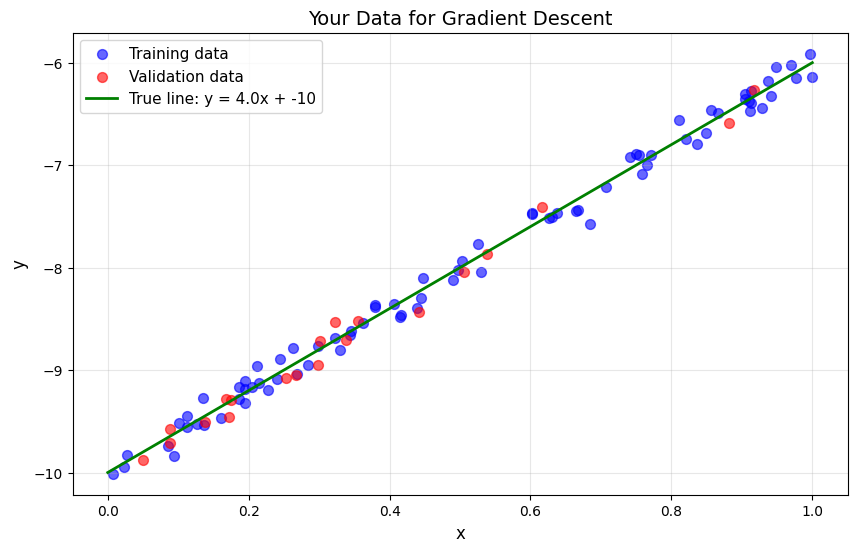

In [59]:
import matplotlib.pyplot as plt
# Simple single plot
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, alpha=0.6, s=50, c='blue', label='Training data')
plt.scatter(x_val, y_val, alpha=0.6, s=50, c='red', label='Validation data')

# Plot true line
x_line = np.linspace(0, 1, 100).reshape(-1, 1)
y_true = true_b + true_w * x_line
plt.plot(x_line, y_true, 'g-', linewidth=2, label=f'True line: y = {true_w}x + {true_b}')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Your Data for Gradient Descent', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

In [60]:
# so like positive correlation
# for sure no much phenomen can be explained by this line
# but couple of candidates
# x = Hours studied → y = Exam score
# x = Years of experience → y = Salary
# x = House size (sq ft) → y = House price
# x = Temperature → y = Ice cream sales
# x = Advertising spend → y = Revenue
# x = Exercise minutes → y = Calories burned
# x = Distance driven → y = Gas used

In [61]:
# so here comes our magic part for gradient descent, how to find the line
# which describes the relation in TRUE LINE, if you are given only data ?!

In [62]:


w = np.random.randn(1)
b = np.random.randn(1)
lr = 0.01
n_epochs = 10000

# straighforard objective fit the line y = wx + b, and use this
# model for predictions
# classic linear regression

# so Training Loop
losses = list()
w_values = list()
b_values = list()


for _ in range(n_epochs):
    # Step #1 Forward pass: you use you current model to make a prediction
    # you prediction may not be good, but like whatever
    # you can't measure or make progress if you don't have any model
    predictions = w*x_train + b

    # Step #2 Use your loss function and calculate your loss
    # by the way this is obviously supervised since you know the target

    error = (predictions - y_train) # y_train is a real data
    # we are using MSE Mean squared error, but there are many more
    loss = (error**2).mean()


    losses.append(loss)
    w_values.append(w[0])
    b_values.append(b[0])



    # Step #3 Ok so here comes non trivial part, you are calculating gradients
    b_grad = 2*error.mean()
    w_grad = 2*(x_train*error).mean()

    # Step #4 Update the parameters
    b = b - lr*b_grad
    w = w - lr*w_grad


print(w,b)
print(loss)

# ok so funny right






[4.00029904] [-10.00511842]
0.010914818941149856


In [63]:
# Ok looks good, now it's time to do it in PyTorch
# and then we move to Fine-Tuning

import torch

# so first is to convert our data in pytorch tensors
x_train_tensor = torch.as_tensor(x_train).float()
y_train_tensor = torch.as_tensor(y_train).float()

In [64]:
import torch.optim as optim
import torch.nn as nn
# ok so known stuff with couple of additions
torch.manual_seed(97)
lr = 0.01
model = nn.Sequential(nn.Linear(in_features=1,out_features=1))
# So our model is y = wx + b
# so it looks like input_dim = 1 and output = 1
# but nn.Linear automatically creates weight(w) and bias(b)!

# see for yourself
linear_layer = model[0]

print("Weight",linear_layer.weight)
print("Bias",linear_layer.bias)

# or we can acess more friendly
for param in model.parameters():
    print(f"{param.data.item()}")

# so when we will do model(x)
# we get
x = torch.tensor([[2.0]])  # Input
y = model(x)
print(f"\nPrediction: y = {linear_layer.weight.item():.4f} * 2.0 + {linear_layer.bias.item():.4f}")
print("DO it manually", -0.4846*2 + -0.2722) # you should get the same
print(f"           y = {y.item():.4f}")

Weight Parameter containing:
tensor([[-0.4846]], requires_grad=True)
Bias Parameter containing:
tensor([-0.2722], requires_grad=True)
-0.48460841178894043
-0.2721668481826782

Prediction: y = -0.4846 * 2.0 + -0.2722
DO it manually -1.2414
           y = -1.2414


In [65]:
# so know optimizer watches parameters to update and will update when you call step()

optimizer = optim.SGD(model.parameters(),lr = 0.1)



# SGD = Stochastic Gradient Descent optimizer
# The idea that we believe that our sample is representative of our dataset
# so in order to save on compute instead of calculating loss for each data point
# before the update
# we will update our model, even when we partially know that update can be done
# turns out to be good idea

# # Regular Gradient Descent (what we did before)
# for epoch in range(n_epochs):
#     predictions = w * x_train + b  # Uses ALL training data
#     loss = compute_loss(predictions, y_train)
#     gradients = compute_gradients(ALL_DATA)
#     update_parameters()

# # Stochastic Gradient Descent
# for epoch in range(n_epochs):
#     for single_sample in training_data:  # One sample at a time!
#         prediction = w * x_sample + b
#         loss = compute_loss(prediction, y_sample)
#         gradient = compute_gradient(ONE_SAMPLE)
#         update_parameters()

# SGD Advantages:

# Memory efficient - doesn't need all data in memory
# Faster updates - update after each sample/batch
# Can escape shallow local minima - noise helps exploration
# Online learning - can learn from streaming data

# SGD Disadvantages:

# Noisy updates - not always moving toward minimum
# Requires more iterations - zigzag path is longer
# Learning rate tuning - more sensitive to lr choice

# In practice: Most deep learning uses Mini-batch SGD (batch size 32-256)
# as it balances efficiency and stability!

# Loss Function also is ready from PyTorch
loss_fn = nn.MSELoss(reduction="mean")

In [66]:
# and here our same algo with Pytorch

# Let's see the initial parameters
print("BEFORE TRAINING:")
print(f"Weight: {model[0].weight.item():.4f}")
print(f"Bias: {model[0].bias.item():.4f}")


n_epochs = 1000
model.train()
for _ in range(n_epochs):
    prediction = model(x_train_tensor)
    loss = loss_fn(prediction,y_train_tensor)

    # computes gradients for w and b
    loss.backward()

    # update the parameters
    optimizer.step()

    # clean up old state # sometimes people use gradient accumulation
    # in order to call step() less

    optimizer.zero_grad()

print("After TRAINING:")
print(f"Weight: {model[0].weight.item():.4f}")
print(f"Bias: {model[0].bias.item():.4f}")

# or more direct acess
print(model.state_dict())


BEFORE TRAINING:
Weight: -0.4846
Bias: -0.2722
After TRAINING:
Weight: 4.0003
Bias: -10.0051
OrderedDict({'0.weight': tensor([[4.0003]]), '0.bias': tensor([-10.0051])})


In [68]:

# Extra:

# Gradient Accumulation Technique:
# python# NORMAL TRAINING (update after each batch):
# for data in dataloader:
#     optimizer.zero_grad()
#     loss = model(data)
#     loss.backward()
#     optimizer.step()  # Update after EVERY batch

# # GRADIENT ACCUMULATION (update after multiple batches):
# accumulation_steps = 4  # Accumulate over 4 batches
# for i, data in enumerate(dataloader):
#     loss = model(data) / accumulation_steps  # Scale loss
#     loss.backward()  # Gradients ADD UP

#     if (i + 1) % accumulation_steps == 0:
#         optimizer.step()     # Update after 4 batches
#         optimizer.zero_grad()  # NOW clear gradients

In [ ]:
# Ok now let's move to fine tuning :))